LetsGrowMore Virtual Internship Program 

Prajakta sawale





task name: Stock Market Prediction And Forecasting Using Stacked  



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
ds = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
ds

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**Describing the Dataset**

In [ ]:
ds.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
ds.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
ds.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
ds['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

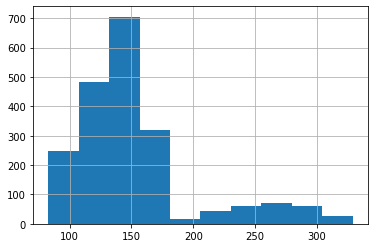

In [ ]:
ds['High'].hist()

<Figure size 1440x576 with 0 Axes>

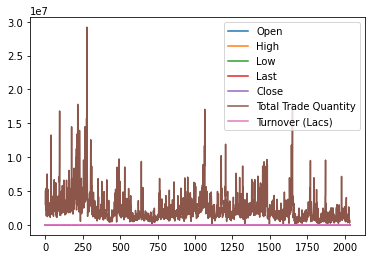

In [ ]:
plt.figure(figsize=(20,8))
ds.plot()

In [ ]:
data_set = ds.filter(['Close'])
Dataset = ds.values
training_data_len=math.ceil(len(ds) * 8)
training_data_len

16280

In [ ]:
Dataset

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [ ]:
ds = ds.iloc[:, 0:6]
ds

,Date,Open,High,Low,Last,Close
0,2018-09-28,234.05,235.95,230.20,233.50,233.75
1,2018-09-27,234.55,236.80,231.10,233.80,233.25
2,2018-09-26,240.00,240.00,232.50,235.00,234.25
3,2018-09-25,233.30,236.75,232.00,236.25,236.10
4,2018-09-24,233.55,239.20,230.75,234.00,233.30
...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90


In [ ]:
training_set = ds.iloc[:, 1:3].values
training_set

array([[234.05, 235.95],
       [234.55, 236.8 ],
       [240.  , 240.  ],
       ...,
       [121.8 , 121.95],
       [120.3 , 122.  ],
       [122.1 , 123.  ]])

**Scalling of Dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_training_scaled = scaler.fit_transform(training_set)

In [ ]:
features_set = []
labels = []
for i in range(80, 586):
  features_set.append(data_training_scaled[i - 60:i, 0])
  labels.append(data_training_scaled[i, 0])

In [ ]:
features_set, labels = np.array(features_set), np.array(labels)

**Building The LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [ ]:
model = Sequential()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data_test= pd.read_csv(url)
data_processed = data_test.iloc[:, 1:3]
data_processed

,Open,High
0,234.05,235.95
1,234.55,236.80
2,240.00,240.00
3,233.30,236.75
4,233.55,239.20
...,...,...
2030,117.60,119.50
2031,120.10,121.00
2032,121.80,121.95
2033,120.30,122.00


**Prediction of the Data**

In [ ]:
data_total = pd.concat((ds['Open'], ds['Open']), axis=0)

In [ ]:
test_inputs = data_total[len(data_total) - len(ds) - 80:].values
test_inputs.shape

(2115,)

In [ ]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

In [ ]:
test_feature = []
for i in range(60, 80):
  test_feature.append(test_inputs[i-60:i, 0])

In [ ]:
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature.shape

(1200, 1)

In [ ]:
predictions = model.predict(test_feature)

In [ ]:
predictions

array([[0.20600162],
       [0.21654502],
       [0.21654502],
       ...,
       [0.6370641 ],
       [0.6281427 ],
       [0.6321979 ]], dtype=float32)

In [ ]:
x_train = ds[0:1256]
y_train = ds[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [ ]:
x_train

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20


**Drawing a Single number from the Normal Distribution**

In [ ]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [ ]:
np.random.normal(1)

0.7506296245225899

**Drawing 6 numbers from Normal Distribution**

In [ ]:
np.random.normal(6)

7.399355436586002

In [ ]:
np.random.seed(42)

In [ ]:
np.random.normal(size=1000, scale=100).std()

97.87262077473541

**Ploting Results**

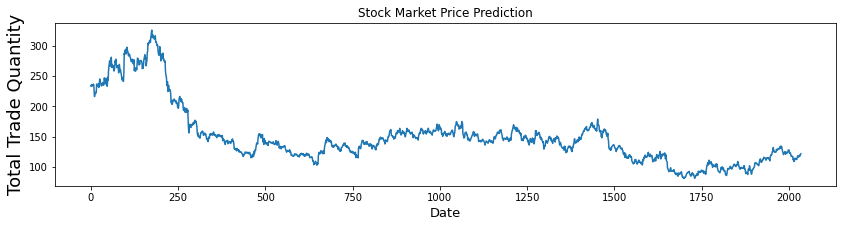

In [ ]:
plt.figure(figsize=(14,3))
plt.title("Stock Market Price Prediction")
plt.plot(data_test['Close'])
plt.xlabel('Date', fontsize=13)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

**Analyze the Closing price from the dataframe**

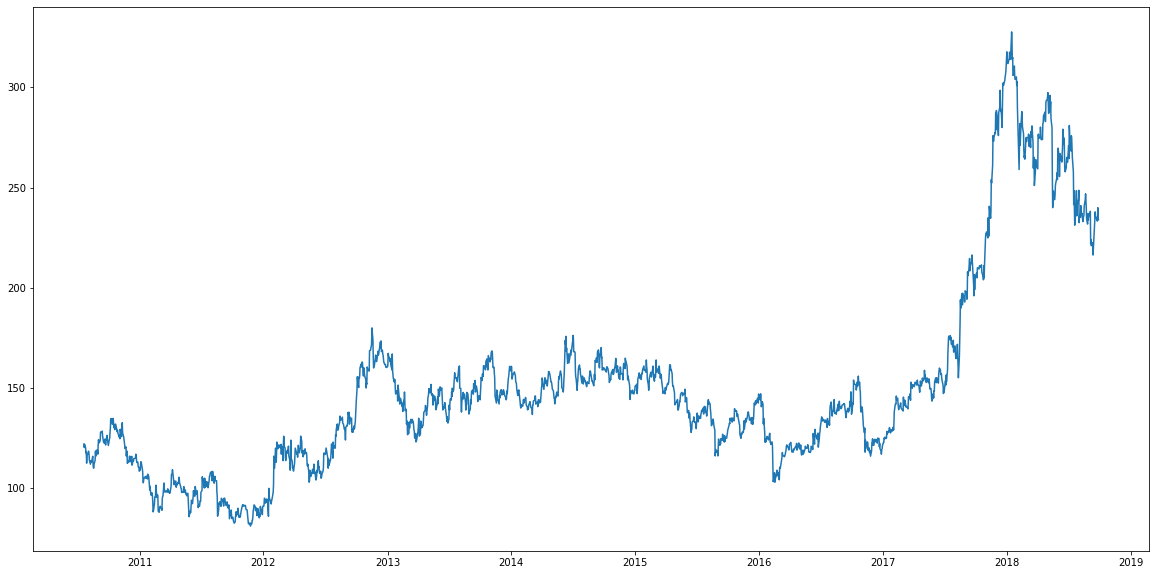

In [ ]:
ds["Date"] = pd.to_datetime(ds.Date)
ds.index = ds['Date']

plt.figure(figsize=(20, 10))
plt.plot(ds["Open"], label='ClosePriceHist')

**Analyze the Closing price from the dataframe**

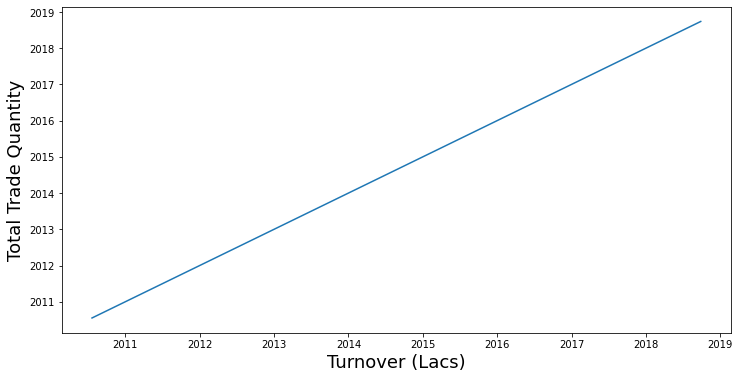

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ds['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

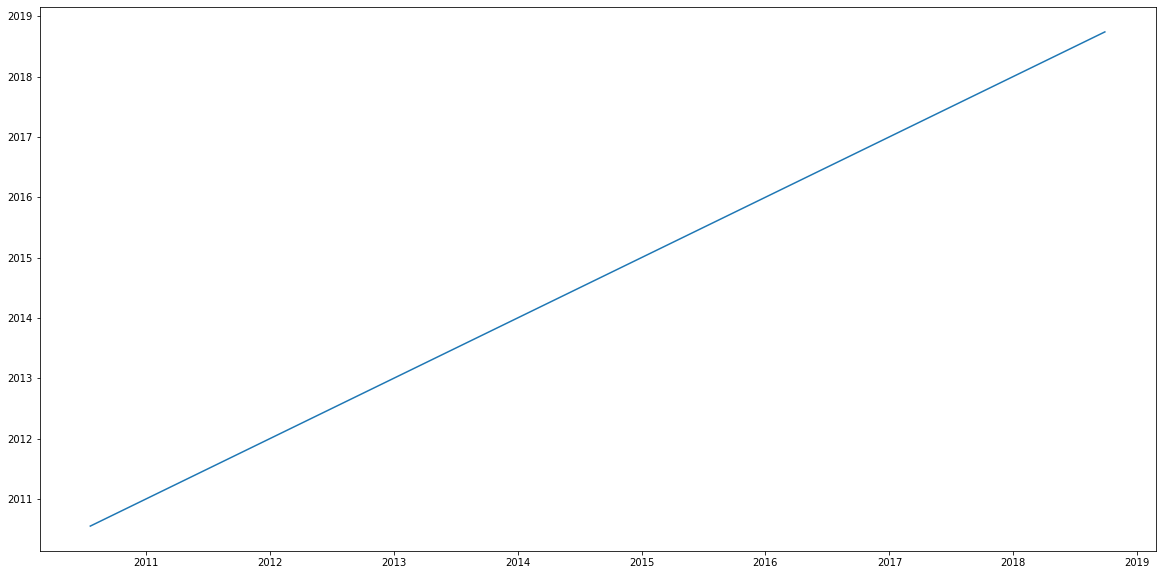

In [ ]:
ds["Turnover (Lacs)"] = pd.to_datetime(ds.Date)
ds.index = ds['Turnover (Lacs)']

plt.figure(figsize=(20, 10))
plt.plot(ds["Turnover (Lacs)"], label='ClosePriceHist')

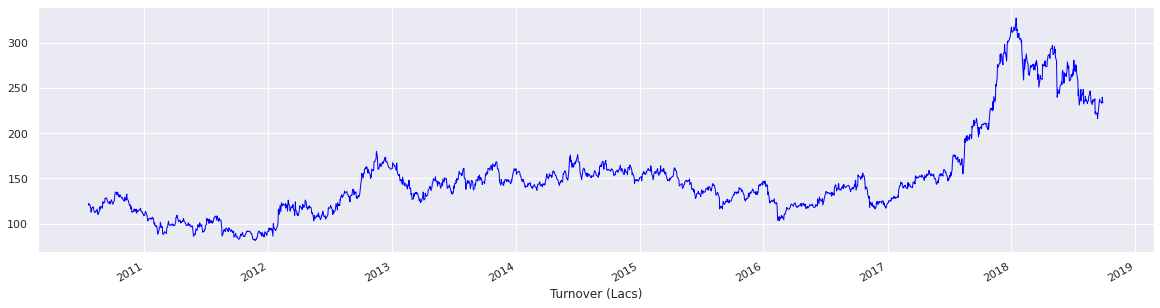

In [ ]:
sns.set(rc = {'figure.figsize': (20, 5)})
ds['Open'].plot(linewidth = 1,color='blue')

In [ ]:
ds.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Turnover (Lacs)'], dtype='object')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


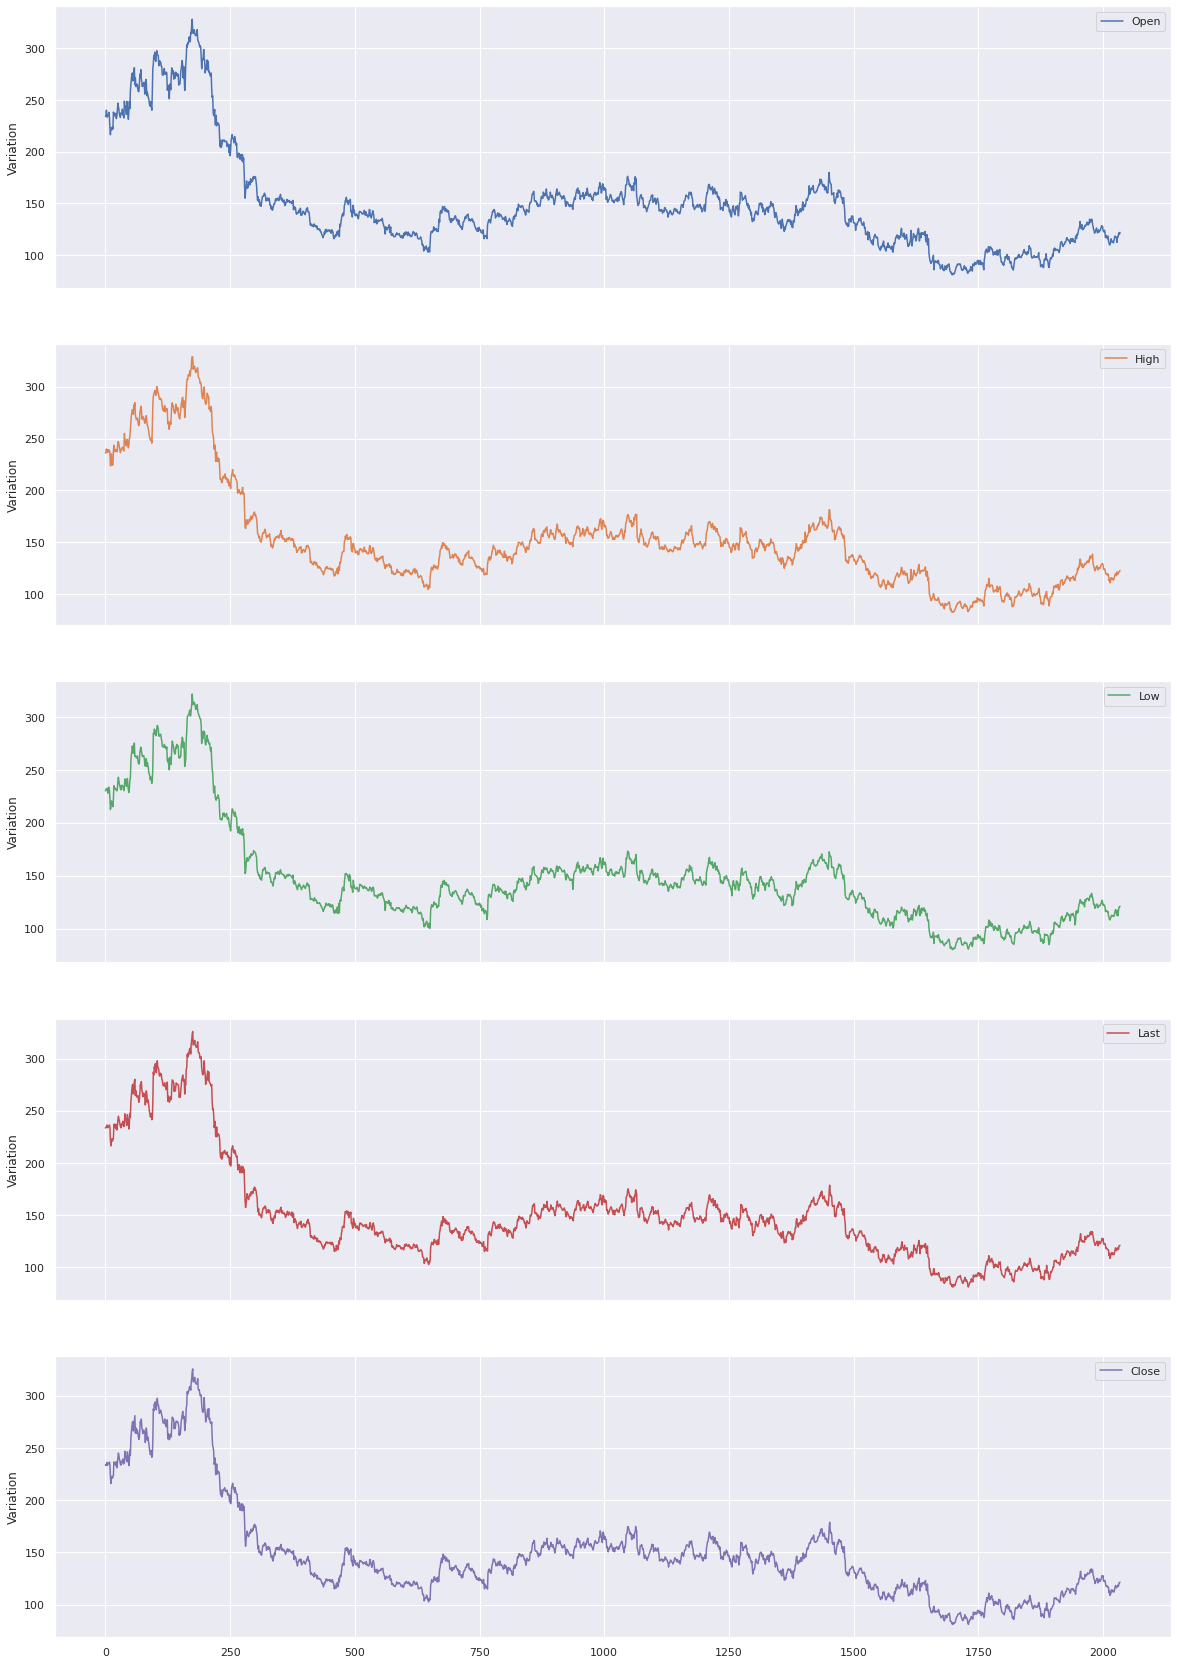

In [ ]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')